In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator

import matplotlib.pyplot as plt 

In [2]:
%load_ext rpy2.ipython
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('data_keywords.csv')
data.head()

,btc_price,grams,quality,escrow,successful_transactions,rating,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,ships_from_FR,ships_to_GB,ships_from_GB,ships_to_CA,ships_from_CA,ships_from_DE,ships_to_AU,ships_from_AU,ships_to_EU,ships_from_EU,ships_from_ES,ships_to_N. America,ships_from_BE,ships_from_WW,ships_to_SI,ships_from_IT,ships_from_BR,intro,colombia,peru,bolivia,caps,free_ship,uncut,fish_cut,brick,crack,crystal,flake,pure
0,51.50,8.517193,92.0,0,100,4.96,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43.20,8.006368,92.0,0,360,4.86,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.535714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38.60,7.600902,89.0,1,70,5.00,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.651163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,30.40,7.600902,90.0,0,100,4.96,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.160000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.89,7.600902,92.0,0,360,4.86,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.535714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
y = data.btc_price
X = data.drop("btc_price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm = LinearRegression() 
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
df = pd.read_csv('fixed_cocaine_listings.csv')
df.head()

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,vendor_link,vendor_name,successful_transactions,rating,ships_from,ships_to,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,ships_from_FR,ships_to_GB,ships_from_GB,ships_to_CA,ships_from_CA,ships_to_DE,ships_from_DE,ships_to_AU,ships_from_AU,ships_to_EU,ships_from_EU,ships_to_ES,ships_from_ES,ships_to_N. America,ships_from_N. America,ships_to_BE,ships_from_BE,ships_to_WW,ships_from_WW,ships_to_SI,ships_from_SI,ships_to_IT,ships_from_IT,ships_to_DK,ships_from_DK,ships_to_S. America,ships_from_S. America,ships_to_CH,ships_from_CH,ships_to_BR,ships_from_BR,ships_to_CZ,ships_from_CZ,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR
0,2841,5KG Bolivian Cocaine 92%,"EU → EU, WW",5000.0,92.0,51.50,0.010300,0.011196,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,BestDutchStuff,100,4.96,EU,"EU, WW",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,4607,✯3kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",3000.0,92.0,43.20,0.014400,0.015652,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,"WW, US",True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3407,COCAINE - 2 KILOGRAM - COLOMBIAN - 89% PURE,"DE → WW, AU",2000.0,89.0,38.60,0.019300,0.021685,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,DutchBulk,70,5.00,DE,"WW, AU",False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2026,2KG Colombian Cocaine 90%,"EU → EU, WW",2000.0,90.0,30.40,0.015200,0.016889,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,BestDutchStuff,100,4.96,EU,"EU, WW",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4606,✯2kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",2000.0,92.0,29.89,0.014945,0.016245,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,"WW, US",True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df['ship_from'] = df.ships_from_to.str[:2]
df.head()

,Unnamed: 0,product_title,ships_from_to,grams,quality,btc_price,cost_per_gram,cost_per_gram_pure,escrow,product_link,vendor_link,vendor_name,successful_transactions,rating,ships_from,ships_to,ships_to_US,ships_from_US,ships_to_NL,ships_from_NL,ships_to_FR,ships_from_FR,ships_to_GB,ships_from_GB,ships_to_CA,ships_from_CA,ships_to_DE,ships_from_DE,ships_to_AU,ships_from_AU,ships_to_EU,ships_from_EU,ships_to_ES,ships_from_ES,ships_to_N. America,ships_from_N. America,ships_to_BE,ships_from_BE,ships_to_WW,ships_from_WW,ships_to_SI,ships_from_SI,ships_to_IT,ships_from_IT,ships_to_DK,ships_from_DK,ships_to_S. America,ships_from_S. America,ships_to_CH,ships_from_CH,ships_to_BR,ships_from_BR,ships_to_CZ,ships_from_CZ,ships_to_SE,ships_from_SE,ships_to_CO,ships_from_CO,ships_to_CN,ships_from_CN,ships_to_PL,ships_from_PL,ships_to_GR,ships_from_GR,ship_from
0,2841,5KG Bolivian Cocaine 92%,"EU → EU, WW",5000.0,92.0,51.50,0.010300,0.011196,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,BestDutchStuff,100,4.96,EU,"EU, WW",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,EU
1,4607,✯3kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",3000.0,92.0,43.20,0.014400,0.015652,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,"WW, US",True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NL
2,3407,COCAINE - 2 KILOGRAM - COLOMBIAN - 89% PURE,"DE → WW, AU",2000.0,89.0,38.60,0.019300,0.021685,1,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,DutchBulk,70,5.00,DE,"WW, AU",False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,DE
3,2026,2KG Colombian Cocaine 90%,"EU → EU, WW",2000.0,90.0,30.40,0.015200,0.016889,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,BestDutchStuff,100,4.96,EU,"EU, WW",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,EU
4,4606,✯2kg FLAKES COCAINE 92% ✯GA✯,"NL → WW, US",2000.0,92.0,29.89,0.014945,0.016245,0,http://lchudifyeqm4ldjj.onion/viewProduct?offe...,http://lchudifyeqm4ldjj.onion/contactMember?me...,gomorraamsterdam,360,4.86,NL,"WW, US",True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NL


In [7]:
ship_from = df.groupby('ship_from').agg({'btc_price': ['mean', 'count']}).reset_index()
ship_from = pd.concat([ship_from['ship_from'],ship_from['btc_price']], axis=1)
ship_from.loc[ship_from['count']<5, 'count_less_than_5'] = 'Yes'
ship_from.loc[ship_from['count']>=5, 'count_less_than_5'] = 'No'
ship_from = ship_from.sort_values('mean', ascending=False)
ship_from

,ship_from,mean,count,count_less_than_5
5,CN,3.350000,1,Yes
9,EU,3.019201,72,No
13,NL,1.590375,496,No
7,DE,1.190882,376,No
15,US,0.903358,112,No
12,IT,0.738067,7,No
0,AU,0.729898,40,No
10,FR,0.633551,70,No
16,WW,0.366559,16,No
3,CA,0.339558,19,No


In [8]:
%R -i ship_from

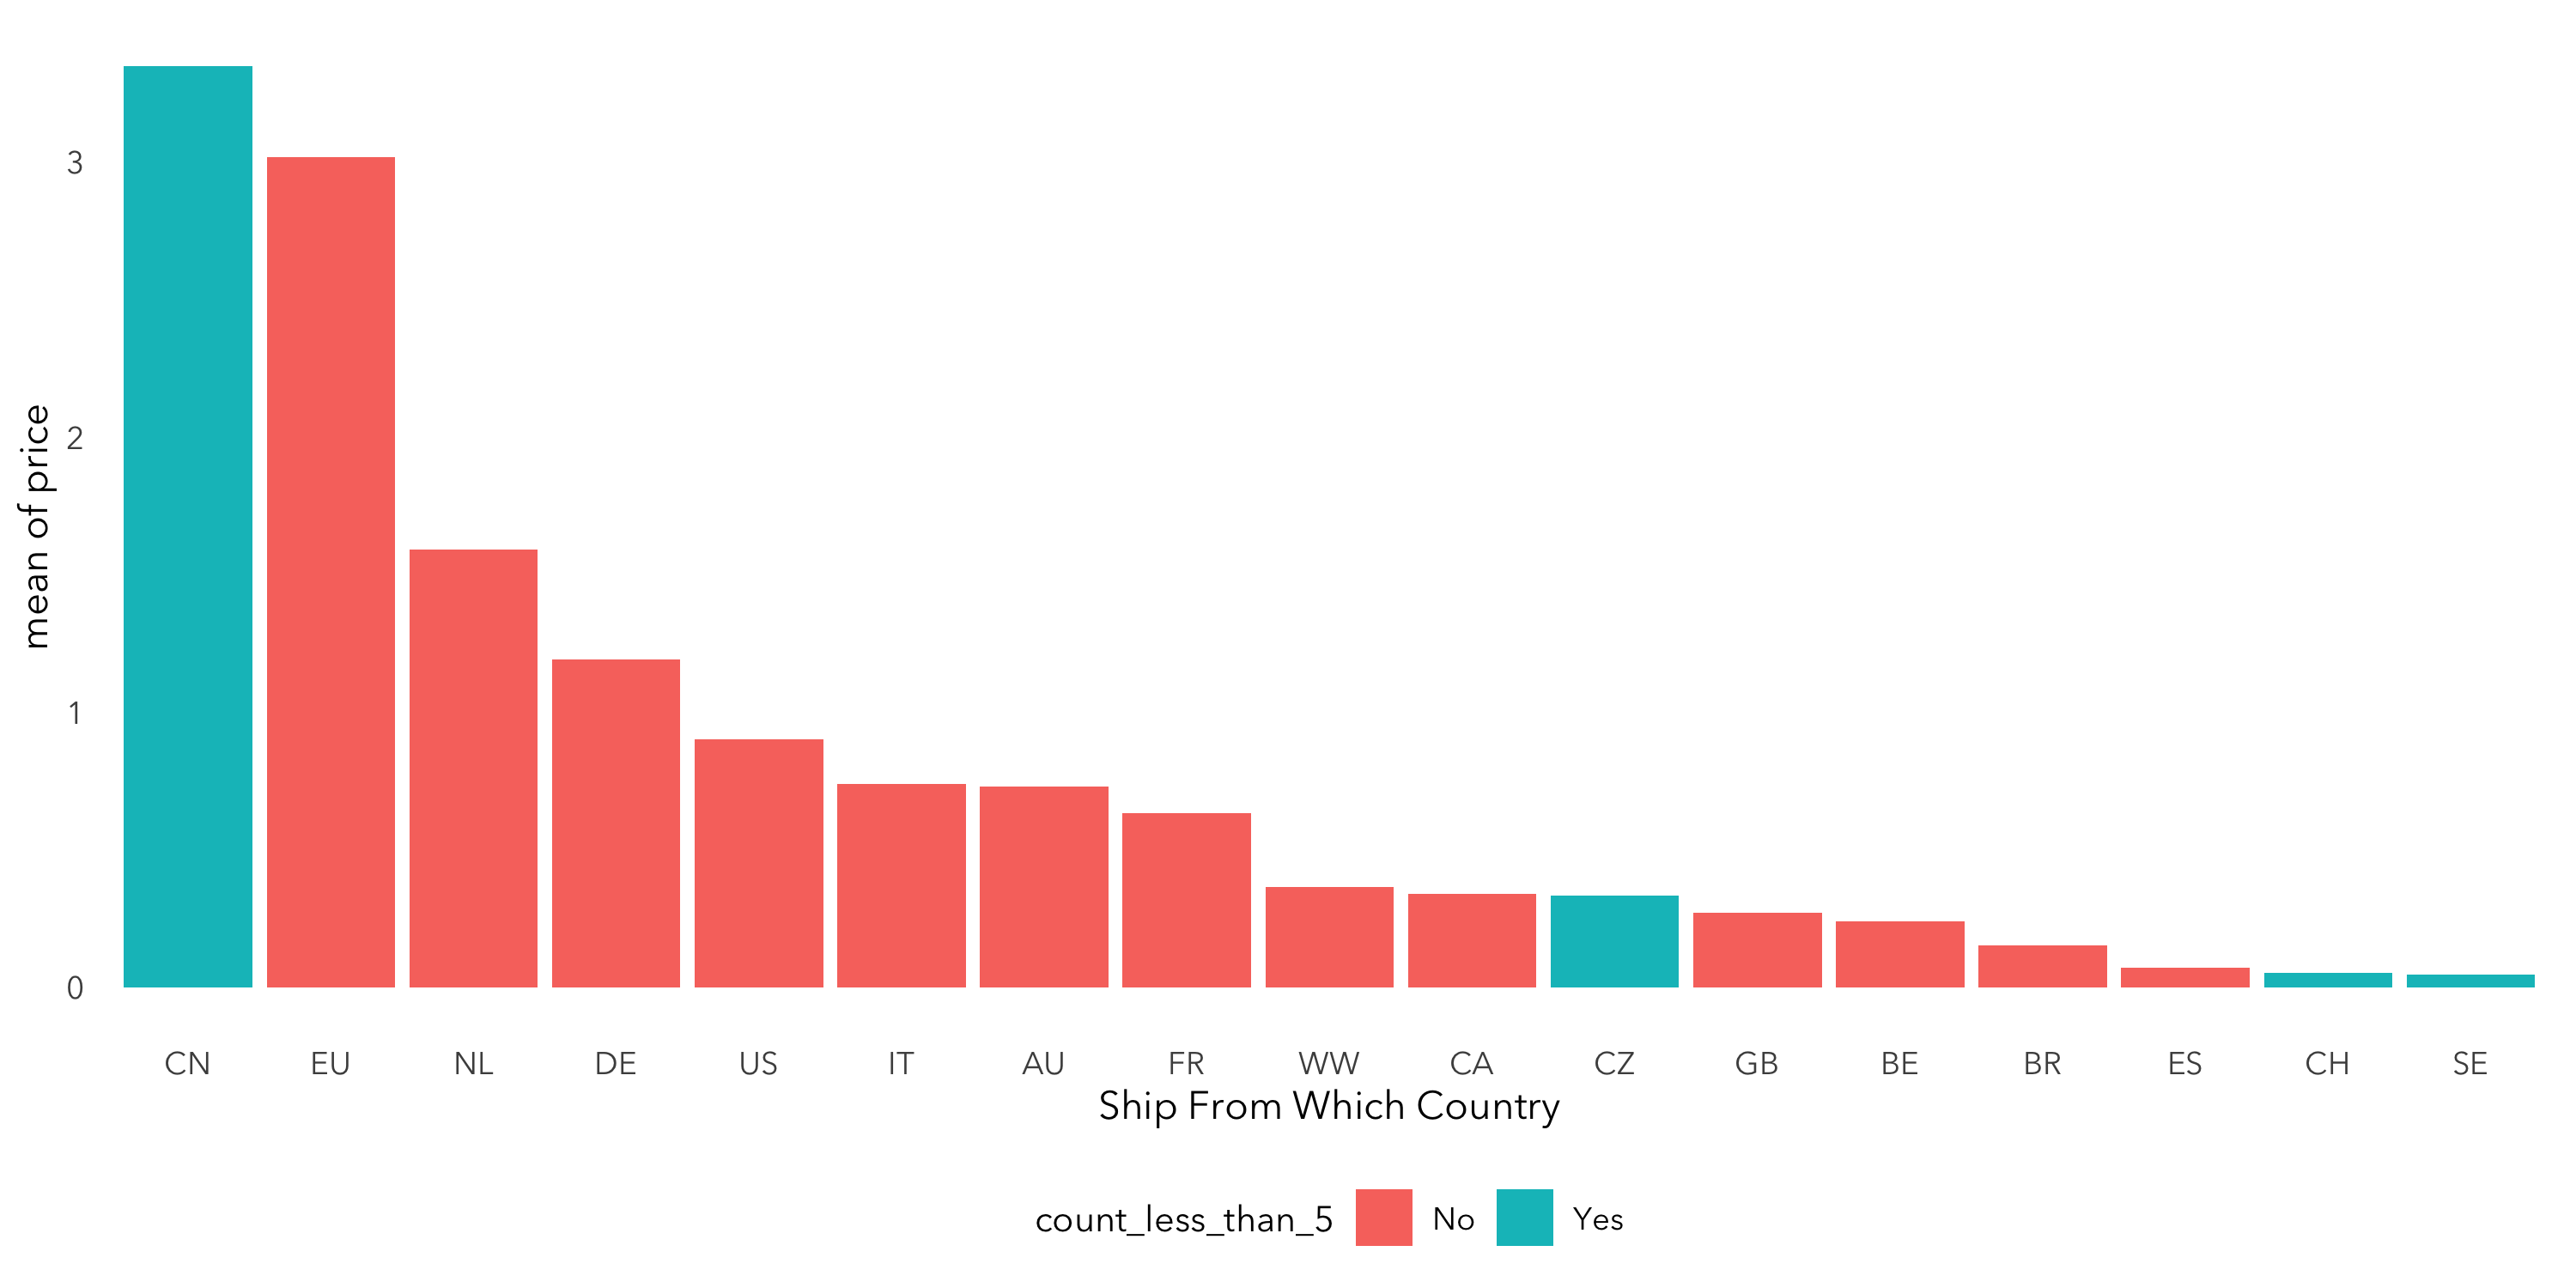

In [9]:
%%R -w 10 -h 5 --units in -r 300
ggplot(data=ship_from) + 
geom_bar(aes(x=reorder(ship_from, -mean), y=mean, fill=count_less_than_5), stat="identity")+
theme_bw() + 
theme(text = element_text(family = 'Avenir Next'),
      axis.ticks = element_blank(),
      panel.border = element_blank(),
      panel.grid = element_blank(),
      legend.position="bottom",
      legend.title = element_text(size = 10)) +
xlab("Ship From Which Country") + ylab("mean of price")

In [10]:
col_lst = list(data.columns[-13:])
col_lst.append('escrow')
col_lst.remove('caps')
col_lst

['intro',
 'colombia',
 'peru',
 'bolivia',
 'free_ship',
 'uncut',
 'fish_cut',
 'brick',
 'crack',
 'crystal',
 'flake',
 'pure',
 'escrow']

In [11]:
def plot_avg_price(col_name):
    new_dataset = data.groupby(col_name).mean()['btc_price'].reset_index()
    new_dataset.plot(x=col_name, y='btc_price', kind='bar', legend=False, figsize=(2,5))
    plt.show()

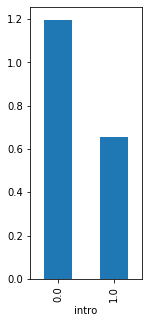

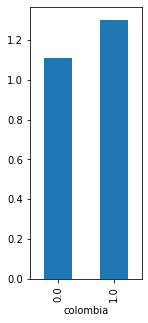

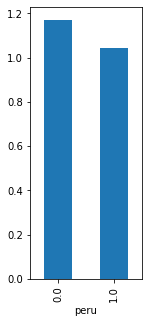

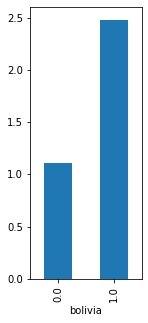

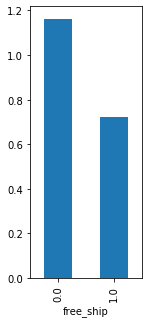

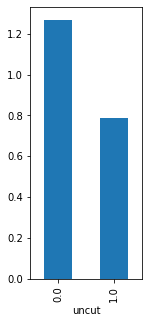

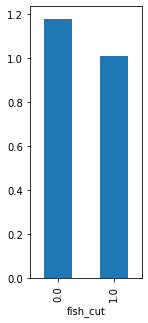

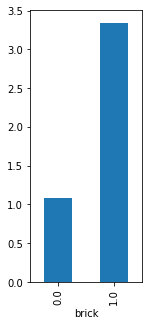

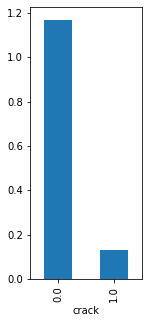

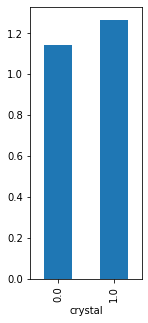

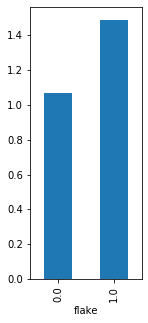

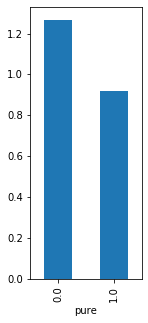

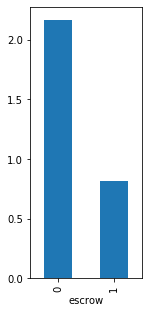

In [12]:
for col in col_lst:
    plot_avg_price(col)